In [1]:
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.graphics.api import qqplot
from patsy import dmatrices
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

Importar series de tiempo

In [2]:
bbdd=pd.read_csv(r'BBDD3.csv',delimiter=';')

A.Inflación de Suma Asegurada

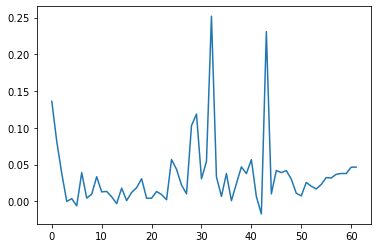

In [3]:
plt.plot(bbdd['SA'])

1.Analisis de Estacionanriedad

In [4]:
X=bbdd['SA'].values
results=adfuller(X)
print('ADF Statistics: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in  results[4].items():
    print ('\t%s: %.3f' % (key,value))

if results[0]<results[4] ["5%"]:
    print("Reject H0 - Time Series Is Stationary")
else:
    print("Failed to Reject H0 - Time Series is Non-Stationary")

ADF Statistics: -7.409966
p-value: 0.000000
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593
Reject H0 - Time Series Is Stationary


2.Definicion de orden de proceso ARMA(p,q)

In [5]:
stepwise_fit=auto_arima(bbdd['SA'], trace= True, supresswarnings= True)
#stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-192.529, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-199.729, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-198.105, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-198.145, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-174.182, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-196.529, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.600 seconds


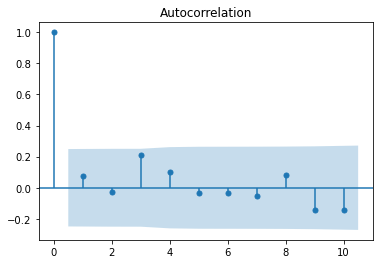

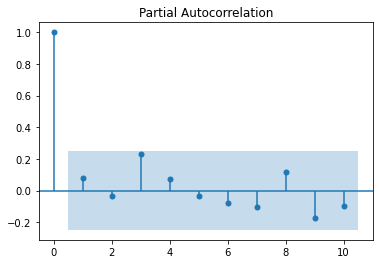

In [6]:
#ACF & PACF
sm.graphics.tsa.plot_acf(bbdd['SA'].values.squeeze(), lags=10)  #MA
sm.graphics.tsa.plot_pacf(bbdd['SA'].values.squeeze(), lags=10) #AR
plt.show()

3.Variables con Correlación significativa

In [7]:
#Separación de variables endógenas y exógenas
dta = bbdd[['SA', 'Dev t', 'Dev t-1', 'Dev t-2', 'Dev t-3', 'Dev t-4', 'Dev t-5' , 'Dev t-6', 'Dev t-7', 'Dev t-8', 'Dev t-9', 'Dev t-10', 'Dev t-11', 'Dev t-12']]
endogena = dta['SA']
exogena = dta[['Dev t', 'Dev t-1', 'Dev t-2', 'Dev t-3', 'Dev t-4', 'Dev t-5' , 'Dev t-6', 'Dev t-7', 'Dev t-8', 'Dev t-9', 'Dev t-10', 'Dev t-11', 'Dev t-12']]
exogena_array=exogena.to_numpy()

In [8]:
#Primera Iteración Modelo de Serie de tiempo
arma_mod20 = ARIMA(endogena2, exog=exogena2 ,order=(0, 0, 0)).fit()
#print(arma_mod20.summary())

NameError: name 'endogena2' is not defined

In [ ]:
#Variables temporales con correlación significativa
endogena2 = dta['SA']
exogena2 = dta[['Dev t', 'Dev t-1', 'Dev t-3', 'Dev t-8', 'Dev t-11']]
exogena2_array=exogena2.to_numpy()

In [ ]:
#Modelo Final
arma_mod20_2 = ARIMA(endogena2, exog=exogena2 ,order=(0, 0, 0)).fit()
print(arma_mod20_2.summary())

4.Análisis de Residuos

In [9]:
residuals = pd.DataFrame(arma_mod20_2.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

NameError: name 'arma_mod20_2' is not defined

B.Inflación de Costo de los Repuestos

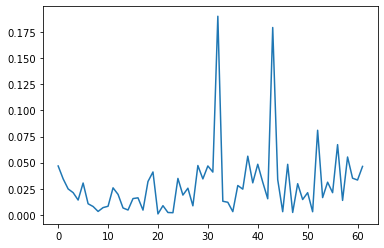

In [10]:
plt.plot(bbdd['Autopartes'])

1.Analisis de Estacionanriedad

In [11]:
Y=bbdd['Autopartes'].values
results=adfuller(Y)
print('ADF Statistics: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in  results[4].items():
    print ('\t%s: %.3f' % (key,value))

if results[0]<results[4] ["10%"]:
    print("Reject H0 - Time Series Is Stationary")
else:
    print("Failed to Reject H0 - Time Series is Non-Stationary")

ADF Statistics: -7.686533
p-value: 0.000000
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593
Reject H0 - Time Series Is Stationary


2.Definicion de orden de proceso ARMA(p,q)

In [12]:
stepwise_fit=auto_arima(bbdd['Autopartes'], trace= True, supresswarnings= True)
#stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-234.379, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-241.720, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-239.720, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-239.720, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-207.671, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-238.168, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.761 seconds


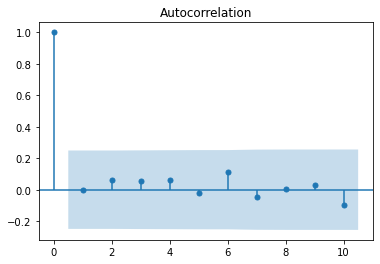

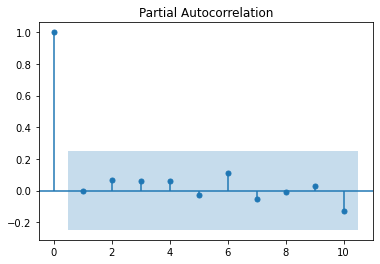

In [13]:
#ACF & PACF
sm.graphics.tsa.plot_acf(bbdd['Autopartes'].values.squeeze(), lags=10)  #MA
sm.graphics.tsa.plot_pacf(bbdd['Autopartes'].values.squeeze(), lags=10) #AR
plt.show()

3.Variables con Correlación significativa

In [14]:
#Separación de variables endógenas y exógenas
dta = bbdd[['Autopartes', 'Dev t', 'Dev t-1', 'Dev t-2', 'Dev t-3', 'Dev t-4', 'Dev t-5' , 'Dev t-6', 'Dev t-7', 'Dev t-8', 'Dev t-9', 'Dev t-10', 'Dev t-11', 'Dev t-12']]
endogena = dta['Autopartes']
exogena = dta[['Dev t', 'Dev t-1', 'Dev t-2', 'Dev t-3', 'Dev t-4', 'Dev t-5' , 'Dev t-6', 'Dev t-7', 'Dev t-8', 'Dev t-9', 'Dev t-10', 'Dev t-11', 'Dev t-12']]
exogena_array=exogena.to_numpy()

In [15]:
#Primera Iteración Modelo de Serie de tiempo
arma_mod21 = ARIMA(endogena, exog=exogena ,order=(0, 0, 0)).fit() #order(p,i,q)
#print(arma_mod21.summary())

In [16]:
#Variables temporales con correlación significativa
endogena2 = dta['Autopartes']
exogena2 = dta[['Dev t', 'Dev t-1', 'Dev t-9']]
exogena2_array=exogena2.to_numpy()

In [17]:
#Modelo Final
arma_mod21_2 = ARIMA(endogena2, exog=exogena2 ,order=(0, 0, 0)).fit()
print(arma_mod21_2.summary())

                               SARIMAX Results                                
Dep. Variable:             Autopartes   No. Observations:                   62
Model:                          ARIMA   Log Likelihood                 152.247
Date:                Wed, 13 Oct 2021   AIC                           -294.495
Time:                        00:03:54   BIC                           -283.859
Sample:                             0   HQIC                          -290.319
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0115      0.004      2.738      0.006       0.003       0.020
Dev t          0.3706      0.024     15.137      0.000       0.323       0.419
Dev t-1        0.1033      0.047      2.205      0.0

4.Análisis de Residuos

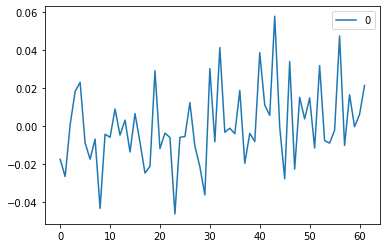

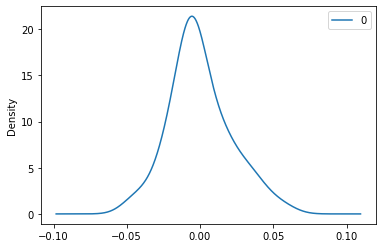

               0
count  62.000000
mean    0.000005
std     0.020933
min    -0.046241
25%    -0.010509
50%    -0.004002
75%     0.011919
max     0.057637


In [18]:
residuals = pd.DataFrame(arma_mod21_2.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

C. Estimación de Trayectoria de GMD
* Variables Exogenas: Variación del tipo de cambio e Inflación Salarial
* Variables Endógenas Modeladas: Inflación de Repuestos y de Vehículos Automotores

In [19]:
#Ejemplo vector input para estimación

In [20]:
#Cotización Suma asegurada y Costo de reposición

In [21]:
#Generación de estimación de GMDt

In [23]:
CR=arma_mod21_2.fit([0.05, 0.03, 0.02])

AttributeError: 'ARIMAResults' object has no attribute 'fit'